# Оглавление

<a href='#1'>Часть 1. Приоритизация гипотез</a>
* <a href='#1.1'>1.1 Знакомство с данными таблицы hypothesis, предобработка </a>
* <a href='#1.2'>1.2 Фреймворк ICE для приоритизации гипотез </a>
* <a href='#1.3'>1.3 Фреймворк RICE для приоритизации гипотез </a>
* <a href='#1.4'>1.4 Как изменилась приоритизация гипотез при применении RICE вместо ICE </a>

<a href='#2'>Часть 2. Анализ A/B-теста</a>
* <a href='#2.1'>2.1 Знакомство с данными таблиц orders и visitors, предобработка </a>
* <a href='#2.2'>2.2 График кумулятивной выручки по группам</a>
* <a href='#2.3'>2.3 График кумулятивного среднего чека по группам</a>
* <a href='#2.4'>2.4 График относительного изменения кумулятивного среднего чека группы B к группе A</a>
* <a href='#2.5'>2.5 График кумулятивной конверсии по группам</a>
* <a href='#2.6'>2.6 График относительного изменения кумулятивной конверсии группы B к группе A</a>
* <a href='#2.7'>2.7 Точечный график количества заказов по пользователям</a>
* <a href='#2.8'>2.8 95-й и 99-й перцентили количества заказов на пользователя</a>
* <a href='#2.9'>2.9 Точечный график стоимостей заказов</a>
* <a href='#2.10'>2.10 95-й и 99-й перцентили стоимости заказов</a>
* <a href='#2.11'>2.11 Статистическая значимость различий в конверсии между группами по «сырым» данным</a>
* <a href='#2.12'>2.12 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a>
* <a href='#2.13'>2.13 Статистическая значимость различий в конверсии между группами по «очищенным» данным</a>
* <a href='#2.14'>2.14 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a>
* <a href='#2.15'>2.15 Вывод - решение по результатам теста </a>

<a href='#3'> Общий вывод</a>

In [4]:
#Импорт библиотек

import pandas as pd #для описания и анализа данных
import matplotlib.pyplot as plt #для работы с графиками
#магия, чтобы график был сразу после выполнения кода
%matplotlib inline 
import plotly.express as px #для работы с графиками
import numpy as np #для эффективной работы с вычислениями и большими массивами
import scipy.stats as stats #для проверки гипотез

<a id='1'></a>
# Часть 1. Приоритизация гипотез

<a id='1.1'></a>
## 1.1 Знакомство с данными таблицы hypothesis, предобработка

In [5]:
#Открываем данные по таблице hypothesis
hypothesis = pd.read_csv('hypothesis.csv')

In [6]:
#Приведем названия столбцов к нижнему регистру для дальнейшей комфортной работы
hypothesis.columns = hypothesis.columns.str.lower()
pd.set_option('max_colwidth', 800) 
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


***Описание данных***

* **hypothesis** — краткое описание гипотезы;
* **reach** — охват пользователей по 10-балльной шкале;
* **impact** — влияние на пользователей по 10-балльной шкале;
* **confidence** — уверенность в гипотезе по 10-балльной шкале;
* **efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Чем больше значение **efforts**, тем дороже проверка гипотезы.

#### **Изучим общую информацию по таблице hypothesis**

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 388.0+ bytes


#### **Проверим на дубликаты**

In [8]:
display(hypothesis.duplicated().sum())

0

Итого у нас 9 гипотез, пропусков и дубликатов в таблице нет, все типы данных соответствуют смысловой нагрузке - можем переходить к анализу.

<a id='1.2'></a>
## 1.2 Фреймворк ICE для приоритизации гипотез

Формула для расчета ICE:
ICE = (Impact * Confidence) / Efforts

In [9]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<a id='1.3'></a>
## 1.3 Фреймворк RICE для приоритизации гипотез

Формула для расчета RICE:
RICE = (Reach * Impact * Confidence) / Efforts

In [10]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id='1.4'></a>
## 1.4 Как изменилась приоритизация гипотез при применении RICE вместо ICE

In [11]:
hypothesis[['hypothesis','ICE','RICE']].style.bar(subset=['ICE', 'RICE'], align='mid', color=['#d65f5f', '#5fba7d'])

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


- При расчете Фреймворка ICE топ-3 гипотезы по параметрам влияния на пользователей, уверенности в гипотезе и затрат ресурсов на проверку - это гипотезы 8, 0, 7.
- При расчете Фреймворка RICE мы учли также параметр охвата пользователей и топ-3 гипотезы  - 7, 2, 0.

Мы видим, что 0 и 7 гипотезы равно оказываются в топ-3 при 2 вариантах приоритизации, причем при расчете RICE 7 гипотеза стала лидером - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', а вот 8 гипотезу - 'Запустить акцию, дающую скидку на товар в день рождения'при расчете RICE заменила 2. Логично, наверно, проверять гипотезы, которые затронут большую часть пользователей, чтобы получить максимальный результат.

<a id='2'></a>
# Часть 2. Анализ A/B-теста

<a id='2.1'></a>
## 2.1 Знакомство с данными таблиц orders и visitors, предобработка

In [13]:
#Открываем данные по таблице hypothesis
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [14]:
#Приведем названия столбцов к нижнему регистру для дальнейшей комфортной работы
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()
display(orders.head())
display(visitors.head())

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


***Описание данных orders***

* **transactionId** — идентификатор заказа;
* **visitorId** — идентификатор пользователя, совершившего заказ;
* **date** — дата, когда был совершён заказ;
* **revenue** — выручка заказа;
* **group** — группа A/B-теста, в которую попал заказ.

***Описание данных visitors***
* **date** — дата;
* **group** — группа A/B-теста;
* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

#### **Изучим общую информацию по таблицам orders и visitors**

In [15]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 37.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


None

#### **Проверка на дубликаты**

In [16]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

#### **Замена типа данных в столбцах с датой**

In [17]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

#### **Проверим, нет ли у нас тех, кто видел 2 версии сайта**

In [18]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [19]:
t = orders.groupby(['visitorid']).agg({'group':'nunique'})
t = t[t['group'] > 1]
display(t.count())
list = t.index.values

group    58
dtype: int64

Выяснили, что 58 пользователей видели 2 версии сайта, чтобы не искажать результаты исследования уберем этих пользователей из датафреймов orders и visitors

In [20]:
# чистим таблицы
orders = orders.query('visitorid not in @list')
visitors = visitors.query('visitors not in @list')

Проверили данные на дубликаты, пропуски -все чисто; заменили тип данных в столбцах с датой для дальнейшей работы.

<a id='2.2'></a>
## 2.2 График кумулятивной выручки по группам

**Создаем массив уникальных пар значений дат и групп теста**

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


**Получаем агрегированные кумулятивные по дням данные о заказах**

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                               orders['group'] == x['group'])]
                                      .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 
                                     'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


**Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина**

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                        visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия**

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования**

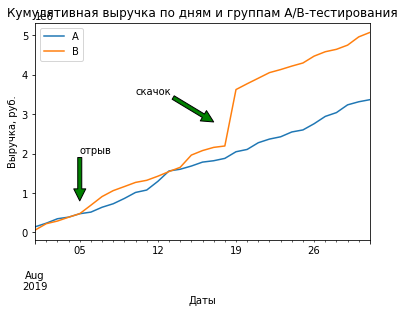

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
ax=cumulativeRevenueA.plot(x='date', y='revenue', label='A')

# Строим график выручки группы B
cumulativeRevenueB.plot(x='date', y='revenue', label='B', ax=ax);

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.xlabel('Даты')
plt.ylabel('Выручка, руб.')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.legend();

Выручка увеличивается в течение всего теста - это хороший знак. Однако выручка по группе B на протяжении практически всего теста выше, чем в группе A. Также по графику видно, в группе B после 19 августа произошел резкий скачок по выручке, тогда как в группе А выручка увеличивается постепенно и без резких изменений.

<a id='2.3'></a>
## 2.3 График кумулятивного среднего чека по группам

In [26]:
#cоздадим столбец со значением среднего чека
cumulativeRevenueA['average_check'] = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']
cumulativeRevenueB['average_check'] = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']

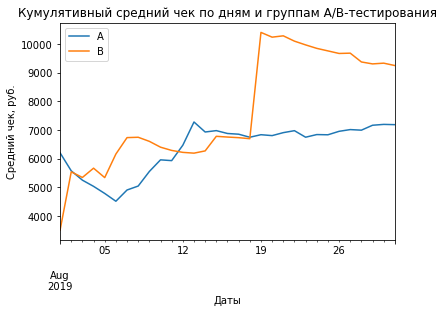

In [27]:
ax=cumulativeRevenueA.plot(x='date', y='average_check', label='A')
cumulativeRevenueB.plot(x='date', y='average_check', label='B', ax=ax);

plt.xlabel('Даты')
plt.ylabel('Средний чек, руб.')
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.legend();

Динамика среднего чека по граппам А и В имеет также в целом закономерный характер и ср. чек группы В выше, чм в группе А, исключая первый день теста и период с 12-14 августа. Кроме того, заметно вырос средний чек в группе В, начиная с 19 августа - теперь понятно, почему выручка на графике сверху во второй половине месяца стала заметно расти.

<a id='2.4'></a>
## 2.4 График относительного изменения кумулятивного среднего чека группы B к A

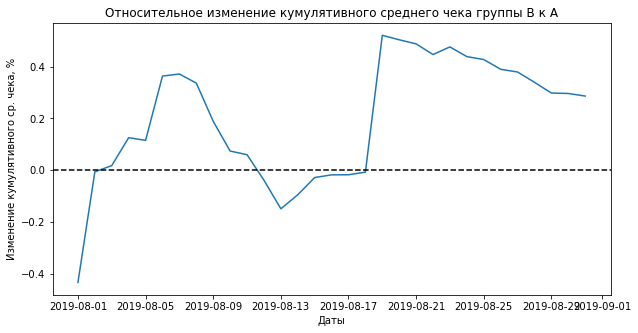

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

plt.xlabel('Даты')
plt.ylabel('Изменение кумулятивного ср. чека, %')
plt.title('Относительное изменение кумулятивного среднего чека группы B к A');


По графику относительного изменения кумулятивного среднего чека группы B к A мы видим, что:
* средний чек на группы В на протяжении практически всего периода выше, чем в группе А
* в нескольких точках график различия между сегментами резко скачет, значит, где-то были крупные заказы и выбросы - берем на заметку и исследуем данные дальше.

<a id='2.5'></a>
## 2.5 График кумулятивной конверсии по группам

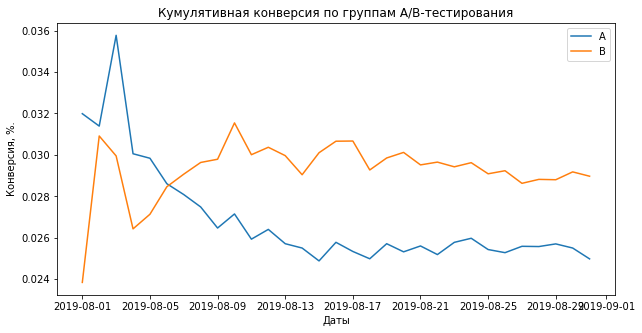

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig = plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Даты')
plt.ylabel('Конверсия, %.')
plt.title('Кумулятивная конверсия по группам A/B-тестирования')
plt.legend();

Кумулятивная конверсия в группе В, начиная с 6 августа значительно превышает кумулятивную конверсию в группе А на протяжении месяца. Значит, такой прирост кумулятивной выручки был не только из-за высокого среднего чека в группе В, но также и благодаря увеличению количества заказов.

<a id='2.6'></a>
## 2.6 График относительного изменения кумулятивной конверсии группы B к A

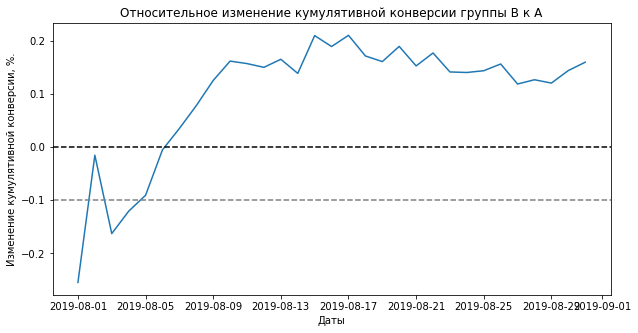

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

plt.xlabel('Даты')
plt.ylabel('Изменение кумулятивной конверсии, %.')
plt.title('Относительное изменение кумулятивной конверсии группы B к A');

Закономерно подтверждаются наши выводы по кумулятивной конверсии и на графике относительного прироста - прирост кумулятивной конверсии группы В составляет примерно 15% на протяжении всего месяца(исключая начало до 5 августа) относительно группы А.

<a id='2.7'></a>
## 2.7 Точечный график количества заказов по пользователям

In [31]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


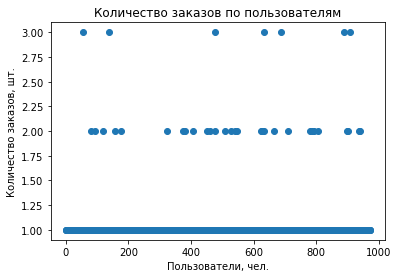

In [32]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['userid','orders']

#строим график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.xlabel('Пользователи, чел.')
plt.ylabel('Количество заказов, шт.')
plt.title('Количество заказов по пользователям');

По графику мы видим, что большая часть пользователей совершает по 1 заказу, но также достаточно много пользователей совершают по 2 заказа. Чтобы вычислить их долю, посчитаем перцентили.

<a id='2.8'></a>
## 2.8 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


5% пользователей заказывали более 1 раза и не более 1% совершали заказ более 2 раз. За нижнюю границу числа заказов возьмем 1 заказ, все, что выше будем считать аномальными значениями.

<a id='2.9'></a>
## 2.9 Точечный график стоимостей заказов

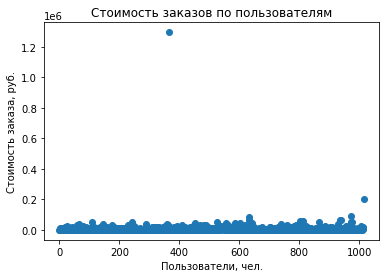

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Пользователи, чел.')
plt.ylabel('Стоимость заказа, руб.')
plt.title('Стоимость заказов по пользователям');

Как мы и предполагали, есть несколько выбросов,однако большая часть пользователей приобретает заказы по стоимости до 100000 руб. Чтобы отбросить аномальные значения, рассчитаем перцентили.

<a id='2.10'></a>
## 2.10 95-й и 99-й перцентили стоимости заказов

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей приобретают заказы по стоимости выше 26 тыс. руб. и не более 1% пользователей совершают покупки на сумму больше 53 тыс. руб. За нижнюю границу стоимости заказов возьмем 26 тыс. руб., все, что выше будем считать аномальными значениями.

<a id='2.11'></a>
## 2.11 Статистическая значимость различий в конверсии между группами по «сырым» данным

In [36]:
#создадим таблицу с количеством визитов пользователей группы А и В по датам
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
display(visitorsADaily.head())

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
display(visitorsBDaily.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


**Получаем агрегированные кумулятивные по дням данные о посетителях**

In [37]:
#получаем данные для группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
display(visitorsACummulative.head())

#получаем данные для группы В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsBCummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


**Получаем кумулятивные данные для группы А и В по заказам и выручке**

In [38]:
#получаем кумулятивные данные для группы А по заказам и выручке
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
display(ordersACummulative.head())


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [39]:
#получаем кумулятивные данные для группы В по заказам и выручке
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
display(ordersBCummulative.head())

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [40]:
#объединяем таблицы 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**Посчитаем статистическую значимость различия в конверсии между группами**

***H0: по конверсии между группами A и B по сырым данным нет статистически значимых различий.***

***H1: по конверсии между группами A и B по сырым данным есть статистически значимые различия.***

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
0.160


Критический уровень статистической значимости будем считать 0.05 - 0.008 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Относительный выигрыш в группе B составляет 13%.

<a id='2.12'></a>
## 2.12 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

***H0: по среднему чеку между группами A и B по сырым данным нет статистически значимых различий.***

***H1: по среднему чеку между группами A и B по сырым данным есть статистически значимые различия.***

In [42]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.415
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

<a id='2.13'></a>
## 2.13 Статистическая значимость различий в конверсии между группами по «очищенным» данным

**Узнаем, сколько всего аномальных пользователей методом shape()**

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 26000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
dtype: int64
(73,)


Всего 73 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 


**Применим статистический критерий Манна-Уитни к полученным выборкам**

***H0: по конверсии между группами A и B по очищенным данным нет статистически значимых различий.***

***H1: по конверсии между группами A и B по очищенным данным есть статистически значимые различия.***

In [45]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.002
0.249


Выводы по конверсии не изменились, немного увеличился P-value и разница между сегментами на 2%.  Посмотрим, произошло ли что-нибудь с результатами по среднему чеку.

<a id='2.14'></a>
## 2.14 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

***H0: по среднему чеку между группами A и B по очищенным данным нет статистически значимых различий.***

***H1: по среднему чеку между группами A и B по очищенным данным есть статистически значимые различия.***

In [46]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.387
-0.045


P-value снизился, но и разница между сегментами сократилась с 28% до -0,2%.

<a id='2.15'></a>
## 2.15 Вывод - решение по результатам теста

*	Мы обнаружили статистически значимое различие по конверсии между группами по «сырым», и также по данным после фильтрации аномалий;
*	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
*	График различия конверсии между группами сообщает, что результаты группы B значитлельно лучше группы A и закономерность сохраняется практически на протяжении всего теста, исключая первые числа месяца.
* График различия среднего чека говорит о том, что результаты группы B на протяжении практически всего периода выше, чем в группе А.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.

<a id='3'></a>
# Общий вывод

**Цель анализа - увеличение выручки интернет-магазина.**

**Первым этапом** мы провели приоритизацию сформулированных отделом маркетинга гипотез для увеличения выручки с помощью 2 фреймворков ***ICE*** и ***RICE*** - получили разные результаты. По фрейморку ***RICE***, включающий параметр охвата пользователей, приоритетной гипотезой оказалась - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Вторым этапом** мы провели анализ А/В-теста, для этого:

2.1 Провели анализ имеющихся данных по заказам и посетителям сайта - выяснили, что 58 пользователей видели 2 версии сайта - подчистили исходные данные для получения корректных результатов теста.

2.2 Рассмотрели показатели за время проведения теста для посетителей каждой из групп:
* показатель кумулятивной выручки -  выручка по группе B на протяжении практически всего теста выше, чем в группе A
* показатель кумулятивного среднего чека - и ср. чек группы В выше, чм в группе А, исключая первый день теста и период с 12-14 августа
* показатель относительного изменения кумулятивного среднего чека группы B к A - средний чек на группы В на протяжении практически всего периода выше, чем в группе А
* показатель кумулятивной конверсии - кумулятивная конверсия в группе В, начиная с 6 августа значительно превышает кумулятивную конверсию в группе А на протяжении месяца - Значит, такой прирост кумулятивной выручки был не только из-за высокого среднего чека в группе В, но также и благодаря увеличению количества заказов.
* показатель относительного изменения кумулятивной конверсии группы B к A - прирост кумулятивной конверсии группы В составляет примерно 15% на протяжении всего месяца(исключая начало до 5 августа) относительно группы А.

2.3 Оценили количество заказов по пользователям - большая часть пользователей совершала только 1 заказ, и не более 5% пользователей более 1 заказа.

2.4 Оценили ср. чек по пользователям - Не более 5% пользователей приобретают заказы по стоимости выше 26 тыс. руб. и не более 1% пользователей совершают покупки на сумму больше 53 тыс. руб.

2.5 Рассчитали статистическую значимость по конверсии и среднему чеку по очиценным данным и по сырым данным:
* Мы обнаружили статистически значимое различие по конверсии между группами по «сырым», и также по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

По окончаю исследования, тест следует остановить и **признать его успешным**. Для увеличения выручки интернет магазина стоит добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.